# A 3D cube

### Setup 

 Basic stack for scientific computation uses numpy (for quick numerical computation). 
 Sympy is a symbolic math computation. 
 

In [1]:
# Import packages for a scientific environment
import matplotlib.pyplot as mpl
import numpy as np
import ipywidgets as widgets
from IPython.display import display

%matplotlib widget
print("numpy version = %s" % np.__version__)

numpy version = 1.23.2


## A straight 3D Cube

We begin by introducing an array of vertices of a 3D cube.

In [2]:
CubeVertices = np.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1],
    ]
)

Next we count all the vertexes of the cube and connect figure out the indexes of the vertexes that should be connected by an edge

In [6]:
CubeEdges = []
for i, vertex_i in enumerate(CubeVertices):
    for j, vertex_j in enumerate(CubeVertices):
        if i > j and np.linalg.norm(vertex_i - vertex_j) < 1.1:
            CubeEdges.append([i, j])
display(CubeEdges)

[[1, 0],
 [2, 0],
 [3, 1],
 [3, 2],
 [4, 0],
 [5, 1],
 [5, 4],
 [6, 2],
 [6, 4],
 [7, 3],
 [7, 5],
 [7, 6]]

Let us now do a 3D plot of the Cube. We use 
- `scatter` to plot the points
- `text` to add text labels

Button(description='Update', style=ButtonStyle())

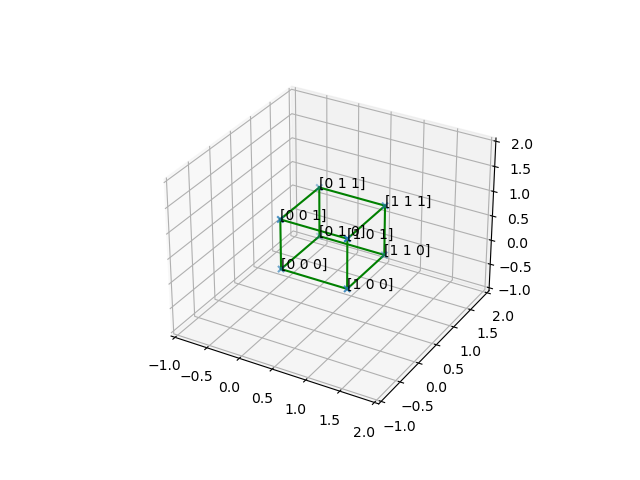

In [7]:
try:
    mpl.close(fig_Cube)
except (NameError, AttributeError):
    pass
fig_Cube = mpl.figure()
ax_Cube = fig_Cube.add_subplot(projection="3d")


def update_fig_Cube(button=None):
    ax_Cube.cla()
    ax_Cube.set(xlim=(-1, 2), ylim=(-1, 2), zlim=(-1, 2))

    ax_Cube.scatter(
        CubeVertices[:, 0], CubeVertices[:, 1], CubeVertices[:, 2], marker="x"
    )
    for vertex in CubeVertices:
        ax_Cube.text(vertex[0], vertex[1], vertex[2], str(vertex))

    for i, j in CubeEdges:
        ax_Cube.plot(*CubeVertices[[i, j]].T, color="green")


update_fig_Cube()

btn_updatefigCube = widgets.Button(description="Update")
display(btn_updatefigCube)
btn_updatefigCube.on_click(update_fig_Cube)

## Rotation matrices

In [8]:
def XRotationMatrix(angle):
    return np.array(
        [
            [1, 0, 0],
            [0, np.cos(angle), -np.sin(angle)],
            [0, np.sin(angle), np.cos(angle)],
        ]
    )


def YRotationMatrix(angle):
    return np.array(
        [
            [np.cos(angle), 0, np.sin(angle)],
            [0, 1, 0],
            [-np.sin(angle), 0, np.cos(angle)],
        ]
    )


def ZRotationMatrix(angle):
    return np.array(
        [
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle), np.cos(angle), 0],
            [0, 0, 1],
        ]
    )


def CreateRotationMatrix(xangle, yangle, zangle):
    return np.matmul(
        np.matmul(XRotationMatrix(xangle), YRotationMatrix(yangle)),
        ZRotationMatrix(zangle),
    )


print("Rotation matrixes w.r.t the x, y, and z axes with angle=1:\n")
display(XRotationMatrix(1), YRotationMatrix(1), ZRotationMatrix(1))

RotationMatrix = CreateRotationMatrix(1, 2, 3)

print("\n\nA full rotation matrix with angles x=1,y=2,z=3:\n")
display(RotationMatrix)

Rotation matrixes w.r.t the x, y, and z axes with angle=1:



array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.54030231, -0.84147098],
       [ 0.        ,  0.84147098,  0.54030231]])

array([[ 0.54030231,  0.        ,  0.84147098],
       [ 0.        ,  1.        ,  0.        ],
       [-0.84147098,  0.        ,  0.54030231]])

array([[ 0.54030231, -0.84147098,  0.        ],
       [ 0.84147098,  0.54030231,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])



A full rotation matrix with angles x=1,y=2,z=3:



array([[ 0.41198225,  0.05872664,  0.90929743],
       [-0.68124272, -0.64287284,  0.35017549],
       [ 0.60512725, -0.76371834, -0.2248451 ]])

Using the rotation matrix we can generate the vertexes of a rotated cube:

In [9]:
RotatedCubeVertices = []


def update_RotatedCubeVertices():
    global RotationMatrix
    global RotatedCubeVertices
    for vertex in CubeVertices:
        RotatedCubeVertices.append(np.matmul(RotationMatrix, vertex))
    RotatedCubeVertices = np.array(RotatedCubeVertices)


update_RotatedCubeVertices()
display(RotatedCubeVertices)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.41198225, -0.68124272,  0.60512725],
       [ 0.05872664, -0.64287284, -0.76371834],
       [ 0.47070889, -1.32411556, -0.15859109],
       [ 0.90929743,  0.35017549, -0.2248451 ],
       [ 1.32127967, -0.33106723,  0.38028215],
       [ 0.96802407, -0.29269735, -0.98856343],
       [ 1.38000632, -0.97394007, -0.38343618]])

## Plotting the rotated Cube

Let us now plot the rotated cube.

Button(description='Update', style=ButtonStyle())

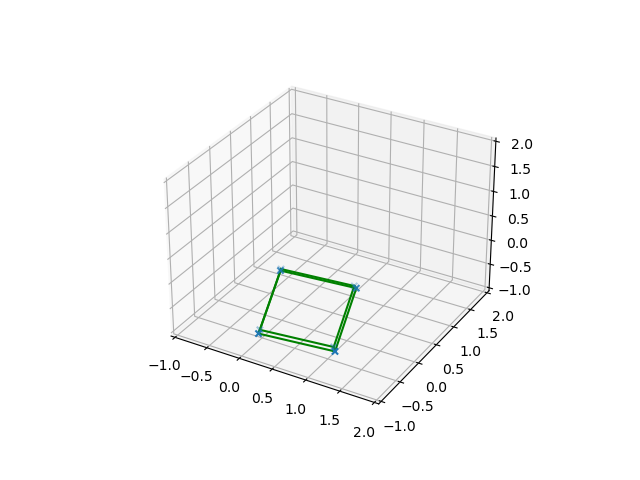

In [11]:
try:
    mpl.close(fig_RotatedCube)
except (NameError, AttributeError):
    pass
fig_RotatedCube = mpl.figure()
ax_RotatedCube = fig_RotatedCube.add_subplot(projection="3d")


def update_fig_RotatedCube(button=None):
    ax_RotatedCube.cla()
    ax_RotatedCube.set(xlim=(-1, 2), ylim=(-1, 2), zlim=(-1, 2))

    ax_RotatedCube.scatter(
        RotatedCubeVertices[:, 0],
        RotatedCubeVertices[:, 1],
        RotatedCubeVertices[:, 2],
        marker="x",
    )
    for i, j in CubeEdges:
        ax_RotatedCube.plot(*RotatedCubeVertices[[i, j]].T, color="green")


update_fig_RotatedCube()

btn_updateRotatedCube = widgets.Button(description="Update")
display(btn_updateRotatedCube)
btn_updateRotatedCube.on_click(update_fig_RotatedCube)

## Projecting the rotated cube onto the $x,y$ plane

Button(description='Update', style=ButtonStyle())

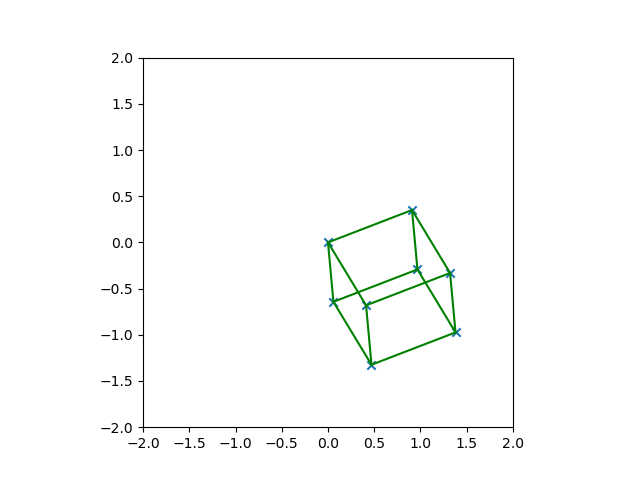

In [12]:
try:
    mpl.close(fig_RotatedCube2D)
except (NameError, AttributeError):
    pass
fig_RotatedCube2D = mpl.figure()
ax_RotatedCube2D = fig_RotatedCube2D.add_subplot()


def update_fig_RotatedCube2D(button=None):
    ax_RotatedCube2D.cla()
    ax_RotatedCube2D.set(aspect=1, xlim=(-2, 2), ylim=(-2, 2))

    ax_RotatedCube2D.scatter(
        RotatedCubeVertices[:, 0], RotatedCubeVertices[:, 1], marker="x"
    )
    for i, j in CubeEdges:
        ax_RotatedCube2D.plot(*RotatedCubeVertices[[i, j]][:,[0,1]].T, color="green")


update_fig_RotatedCube2D()

btn_updateRotatedCube2D = widgets.Button(description="Update")
display(btn_updateRotatedCube2D)
btn_updateRotatedCube2D.on_click(update_fig_RotatedCube2D)